In [1]:
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [2]:
#import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#pd.options.display.max_rows = 999
#pd.get_option("display.max_rows")

In [4]:
# Control whether to import the original data. 
import_original_data = True
write_excel = True

Mila:

OK only four files needed to be corrected. I put them in your Meta4 folder under the name Elviz_Corrected

The remaining four files indeed contained fewer contigs.

Thanks!


In [5]:
import sys
print(sys.executable)
print(sys.version)

/Users/janet/.virtualenvs/meta4/bin/python3
3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [6]:
print(os.getcwd())

/Users/janet/elvizAnalysis


In [7]:
sns.set(style="whitegrid")

In [8]:
# Import the csv that translates the 127_HOW14 type labels to weeks and replicates.

from elviz_utils import IMPORT_METAINFO_TYPES, read_sample_info

In [9]:
sample_info = read_sample_info()

sample_info.head()

,ID,oxy,rep,week,project
0,1_LOW4,Low,1,4,1056013
1,13_LOW5,Low,1,5,1056037
2,25_LOW6,Low,1,6,1056061
3,37_LOW7,Low,1,7,1056085
4,49_LOW8,Low,1,8,1056109


In [10]:
# loop over each file, collapse rows that share phylogeny data to the genus label,
# save new .csv files, then append them all together in a separate step. 
#filepath = '/Volumes/Shares/Users/Janet/meta4/160121_elviz_files_updated/'
filepath = './raw_data'
elviz_files = [f for f in os.listdir(filepath) if ".csv" in f]
print(len(elviz_files))
!ls ./data/*.csv | wc -l

88
ls: ./data/*.csv: No such file or directory
       0


In [11]:
from abundance_utils import read_and_reduce_elviz_csv

In [12]:
from abundance_utils import read_elviz_csv
tmp = read_elviz_csv(filename = 'elviz-contigs-1056169.csv', 
                                filepath=filepath)

In [13]:
tmp.head()

,contigId,Average fold,Length,Reference GC,Covered percent,Covered bases,Plus reads,Minus reads,Median fold,Read GC,Complete Lineage,IMG scaffold_oid,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,scaffold43449,6.2,596,0.7181,100,596,12,13,7,0.7249,0.0.2.1.0.0.2,Ga0066453_1043449,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Haloarcula,
1,scaffold21821,3.7,928,0.6767,100,928,11,12,4,0.6729,0.0.2.1.0.0.17,Ga0066453_1021821,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Halorubrum,
2,scaffold44319,3.6,588,0.6344,100,588,7,7,3,0.6346,0.0.2.1.0.0.17,Ga0066453_1044319,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Halorubrum,
3,scaffold08061,69.0,1773,0.6661,100,1773,413,415,73,0.6636,0.0.2.2.0.0.0,Ga0066453_1008061,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,
4,scaffold48467,44.5,554,0.3412,100,554,81,89,46,0.3463,0.0.2.2.0.0.0,Ga0066453_1048467,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,


In [14]:
tmp['Genus'].unique()

array(['Haloarcula', 'Halorubrum', 'Methanobacterium',
       'Methanobrevibacter', 'Methanocella', 'Methanoculleus',
       'Methanosaeta', 'Methanolobus', 'Methanosalsum', '',
       'Acidobacterium', 'Granulicella', 'Terriglobus', 'Geothrix',
       'Holophaga', 'Ilumatobacter', 'Actinomyces', 'Actinospica',
       'Cellulomonas', 'Corynebacterium', 'Cryptosporangium', 'Austwickia',
       'Frankia', 'Blastococcus', 'Geodermatophilus', 'Modestobacter',
       'Gordonia', 'Intrasporangium', 'Janibacter', 'Agromyces',
       'Leifsonia', 'Leucobacter', 'Microbacterium', 'Salinibacterium',
       'Arthrobacter', 'Actinoplanes', 'Catelliglobosispora', 'Hamadaea',
       'Micromonospora', 'Salinispora', 'Mycobacterium', 'Nocardia',
       'Rhodococcus', 'Smaragdicoccus', 'Nocardioides', 'Marinactinospora',
       'Nocardiopsis', 'Isoptericola', 'Microlunatus', 'Propionibacterium',
       'Actinokineospora', 'Actinomycetospora', 'Amycolatopsis',
       'Pseudonocardia', 'Saccharomonospora

In [15]:
tmp[tmp['Kingdom']=='unassigned'].head()

,contigId,Average fold,Length,Reference GC,Covered percent,Covered bases,Plus reads,Minus reads,Median fold,Read GC,Complete Lineage,IMG scaffold_oid,Kingdom,Phylum,Class,Order,Family,Genus,Species
49460,scaffold03426,15.9,3200,0.5078,100,3200,174,168,16,0.5199,0.12,Ga0066453_1003426,unassigned,,,,,,
49461,scaffold05049,4.9,2428,0.5445,100,2428,40,40,4,0.5539,0.12,Ga0066453_1005049,unassigned,,,,,,
49462,scaffold05240,18.2,2372,0.5906,100,2372,147,145,18,0.5924,0.12,Ga0066453_1005240,unassigned,,,,,,
49463,scaffold05598,5.2,2272,0.5647,100,2272,39,40,5,0.5636,0.12,Ga0066453_1005598,unassigned,,,,,,
49464,scaffold05691,16.5,2252,0.5639,100,2252,126,125,16,0.5600,0.12,Ga0066453_1005691,unassigned,,,,,,


In [16]:
from abundance_utils import reduce_elviz_to_genus_rpk

tmp2 = reduce_elviz_to_genus_rpk(tmp)

In [17]:
tmp2.head(10)

,Kingdom,Phylum,Class,Order,Family,Genus,Length,sum of reads per kilobase
0,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,,other,20055769,1219694.329371
1,Bacteria,Proteobacteria,Gammaproteobacteria,,,other,4205589,847104.939588
2,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,other,8980139,760524.734915
3,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,10652885,724409.523158
4,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Acidovorax,8257013,589598.666600
5,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,6768132,328736.874405
6,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylophilus,2921876,233656.167095
7,Bacteria,Proteobacteria,,,,other,4278523,216527.182061
8,Bacteria,Proteobacteria,Betaproteobacteria,,,other,2469532,129687.193502
9,unassigned,,,,,other,483504,82614.842801


In [18]:
print(tmp2['sum of reads per kilobase'].sum())
print(233656/(tmp2['sum of reads per kilobase'].sum()))

6478151.95059
0.0360683111144


In [19]:
from abundance_utils import read_and_reduce_elviz_csv

read_and_reduce_elviz_csv(
    filename = 'elviz-contigs-1056169.csv', 
    filepath=filepath,
    sample_info = sample_info)

,Kingdom,Phylum,Class,Order,Family,Genus,Length,abundance,filepath,project,ID,oxy,rep,week
0,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,,other,20055769,0.188278,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
1,Bacteria,Proteobacteria,Gammaproteobacteria,,,other,4205589,0.130763,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
2,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,other,8980139,0.117398,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
3,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,10652885,0.111823,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
4,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Acidovorax,8257013,0.091013,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
5,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,6768132,0.050745,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
6,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylophilus,2921876,0.036068,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
7,Bacteria,Proteobacteria,,,,other,4278523,0.033424,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
8,Bacteria,Proteobacteria,Betaproteobacteria,,,other,2469532,0.020019,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
9,unassigned,,,,,other,483504,0.012753,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10


In [20]:
#from abundance_utils import norm_by_ID
##tmp2['project'] = 'xxx'
#tmp3 = tmp2.groupby('project').apply(norm_by_ID)
#tmp3.head()

In [21]:
# test read_and_reduce_elviz_csv
tmp = read_and_reduce_elviz_csv(filename = 'elviz-contigs-1056169.csv', 
                                filepath=filepath,
                               sample_info=sample_info)

In [22]:
tmp.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Length,abundance,filepath,project,ID,oxy,rep,week
0,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,,other,20055769,0.188278,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
1,Bacteria,Proteobacteria,Gammaproteobacteria,,,other,4205589,0.130763,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
2,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,other,8980139,0.117398,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
3,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,10652885,0.111823,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10
4,Bacteria,Proteobacteria,Betaproteobacteria,Burkholderiales,Comamonadaceae,Acidovorax,8257013,0.091013,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10


In [23]:
tmp[tmp['Kingdom']=='unassigned'].head()

,Kingdom,Phylum,Class,Order,Family,Genus,Length,abundance,filepath,project,ID,oxy,rep,week
9,unassigned,,,,,other,483504,0.012753,./raw_data/elviz-contigs-1056169.csv,1056169,79_HOW10,High,1,10


In [24]:
# import the raw or raw-ish data. 
if import_original_data:
    filepath = './raw_data'
    elviz_files = [f for f in os.listdir(filepath) if ".csv" in f]
    print(elviz_files[1:4])

['elviz-contigs-1056016.csv', 'elviz-contigs-1056019.csv', 'elviz-contigs-1056022.csv']


In [25]:
#if not os.path.exists('./results'):
#    os.makedirs('./results/')
#if not os.path.exists('./plots'):
#    os.makedirs('./plots/')

from abundance_utils import make_directory

make_directory(dirpath="./plots")
make_directory(dirpath='results')

In [26]:
from abundance_utils import read_and_reduce_all

In [27]:
from abundance_utils import project_number_from_filename

In [28]:
project_number_from_filename(elviz_files[0])

1056013

In [29]:
if import_original_data:
    data_reduced = read_and_reduce_all(filename_list=elviz_files,
                                       filepath=filepath,
                                       sample_info = sample_info)
    print(data_reduced.size)  
else: 
    data_reduced = pd.read_csv("./results/reduced_data--all_phylogeny_remains.csv")

data_reduced.head()

elviz-contigs-1056016.csv
elviz-contigs-1056019.csv
elviz-contigs-1056022.csv
elviz-contigs-1056025.csv
elviz-contigs-1056028.csv
elviz-contigs-1056031.csv
elviz-contigs-1056034.csv
elviz-contigs-1056037.csv
elviz-contigs-1056040.csv
elviz-contigs-1056043.csv
elviz-contigs-1056046.csv
elviz-contigs-1056049.csv
elviz-contigs-1056052.csv
elviz-contigs-1056055.csv
elviz-contigs-1056058.csv
elviz-contigs-1056061.csv
elviz-contigs-1056064.csv
elviz-contigs-1056067.csv
elviz-contigs-1056070.csv
elviz-contigs-1056073.csv
elviz-contigs-1056076.csv
elviz-contigs-1056079.csv
elviz-contigs-1056082.csv
elviz-contigs-1056085.csv
elviz-contigs-1056088.csv
elviz-contigs-1056091.csv
elviz-contigs-1056094.csv
elviz-contigs-1056097.csv
elviz-contigs-1056100.csv
elviz-contigs-1056103.csv
elviz-contigs-1056106.csv
elviz-contigs-1056109.csv
elviz-contigs-1056112.csv
elviz-contigs-1056115.csv
elviz-contigs-1056118.csv
elviz-contigs-1056121.csv
elviz-contigs-1056124.csv
elviz-contigs-1056127.csv
elviz-contig

,Kingdom,Phylum,Class,Order,Family,Genus,Length,abundance,filepath,project,ID,oxy,rep,week
0,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,9948861,0.228531,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
1,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylotenera,5066955,0.220860,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
2,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,4654774,0.054719,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
3,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,other,3046340,0.047956,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
4,Bacteria,Proteobacteria,Gammaproteobacteria,,,other,5620690,0.040903,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4


In [30]:
data_reduced['project'].unique()

array([1056013, 1056016, 1056019, 1056022, 1056025, 1056028, 1056031,
       1056034, 1056037, 1056040, 1056043, 1056046, 1056049, 1056052,
       1056055, 1056058, 1056061, 1056064, 1056067, 1056070, 1056073,
       1056076, 1056079, 1056082, 1056085, 1056088, 1056091, 1056094,
       1056097, 1056100, 1056103, 1056106, 1056109, 1056112, 1056115,
       1056118, 1056121, 1056124, 1056127, 1056130, 1056133, 1056136,
       1056139, 1056142, 1056145, 1056148, 1056151, 1056154, 1056157,
       1056160, 1056163, 1056166, 1056169, 1056172, 1056175, 1056178,
       1056181, 1056184, 1056187, 1056190, 1056193, 1056196, 1056199,
       1056202, 1056205, 1056208, 1056211, 1056214, 1056217, 1056220,
       1056223, 1056226, 1056229, 1056232, 1056235, 1056238, 1056241,
       1056244, 1056247, 1056250, 1056253, 1056256, 1056259, 1056262,
       1056265, 1056268, 1056271, 1056274])

In [31]:
if import_original_data:
    data_reduced.to_csv("./results/reduced_data--all_phylogeny_remains.csv", index=False)

In [32]:
data_reduced.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Length,abundance,filepath,project,ID,oxy,rep,week
0,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,9948861,0.228531,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
1,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylotenera,5066955,0.220860,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
2,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,4654774,0.054719,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
3,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,other,3046340,0.047956,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
4,Bacteria,Proteobacteria,Gammaproteobacteria,,,other,5620690,0.040903,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4


In [33]:
# Should have only 1 row per Id now. 
methylophilus_only = data_reduced[data_reduced['Genus']=='Methylophilus']
print(methylophilus_only[['ID', 'Length', 'abundance']].sort_values('Length'))

            ID   Length  abundance
211    63_LOW9    15882   0.000041
52    73_LOW10    20437   0.000689
109    51_LOW8    29583   0.000176
109   74_LOW10    33515   0.000285
22   122_LOW14    39064   0.002480
62    92_HOW11    42204   0.000694
100   75_LOW10    45610   0.000150
27   124_LOW14    46654   0.001763
23   121_LOW14    47061   0.002799
25     61_LOW9    52709   0.002151
73      4_LOW4    52969   0.000787
27   112_LOW13    55629   0.001866
65     13_LOW5    58884   0.000820
60      9_HOW4    60376   0.000939
29      8_HOW4    61368   0.001568
122  123_LOW14    68043   0.000180
33     49_LOW8    71714   0.001022
43      3_LOW4    72753   0.001264
46      2_LOW4    73660   0.001123
43      1_LOW4    74310   0.001383
69     39_LOW7    77028   0.000437
47     14_LOW5    88088   0.001272
58     27_LOW6    88622   0.000894
47     15_LOW5    93077   0.001253
54     37_LOW7    96499   0.000737
46     57_HOW8    96525   0.000938
32     10_HOW4   101934   0.001683
37      7_HOW4   105

In [34]:
from abundance_utils import prepare_excel_dictionary
  
prepare_excel_dictionary(dataframe = data_reduced)

{('High', 1): 'elviz_binned--HighO2_rep1.xlsx',
 ('High', 2): 'elviz_binned--HighO2_rep2.xlsx',
 ('High', 3): 'elviz_binned--HighO2_rep3.xlsx',
 ('High', 4): 'elviz_binned--HighO2_rep4.xlsx',
 ('Low', 1): 'elviz_binned--LowO2_rep1.xlsx',
 ('Low', 2): 'elviz_binned--LowO2_rep2.xlsx',
 ('Low', 3): 'elviz_binned--LowO2_rep3.xlsx',
 ('Low', 4): 'elviz_binned--LowO2_rep4.xlsx'}

In [35]:
#from abundance_utils import prepare_excel_writer_dict 
#prepare_excel_writer_dict(dataframe = data_reduced)

#from abundance_utils import write_excel
  
#write_excel(dataframe = data_reduced)

In [36]:
if write_excel:
    from abundance_utils import write_excel_files
    write_excel_files(dataframe = data_reduced, filepath = './results')

In [37]:
data_reduced.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Length,abundance,filepath,project,ID,oxy,rep,week
0,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylobacter,9948861,0.228531,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
1,Bacteria,Proteobacteria,Betaproteobacteria,Methylophilales,Methylophilaceae,Methylotenera,5066955,0.220860,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
2,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,4654774,0.054719,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
3,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,other,3046340,0.047956,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4
4,Bacteria,Proteobacteria,Gammaproteobacteria,,,other,5620690,0.040903,./raw_data/elviz-contigs-1056013.csv,1056013,1_LOW4,Low,1,4


In [38]:
from abundance_utils import reduce_to_genus_only
data_reduced_genus = reduce_to_genus_only(data_reduced)
data_reduced_genus.head()

,ID,rep,week,oxy,Genus,Length,abundance,project
2432,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
42797,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
50891,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202
45856,82_HOW10,4,10,High,Methylobacter,5488758,0.693746,1056178
26673,40_LOW7,4,7,Low,Methylobacter,6012817,0.668513,1056094


In [39]:
# Write a copy to csv
if import_original_data:
    data_reduced_genus.to_csv(
        "./results/reduced_data--genus_only.csv", index=False)

In [40]:
# print(data_reduced_genus[['rep','week', 'ID']].drop_duplicates())

In [41]:
data_reduced_genus.head(3)

,ID,rep,week,oxy,Genus,Length,abundance,project
2432,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
42797,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
50891,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202


In [42]:
by_repl_and_week_Genus = data_reduced_genus.groupby(['rep','week','oxy'])#.to_excel(writer,sheet_name='Sheet1')
# check that replicates and week are in the right order: 
#for tup, d in by_repl_and_week_Genus:
#    print tup

In [43]:
if write_excel:
    write_excel_files(dataframe= data_reduced_genus, 
             filepath = './results', 
             by_genus=True)

# Plotting

In [44]:
from abundance_utils import filter_by_abundance

filter_by_abundance(data=data_reduced_genus, 
                    column='abundance', high=1, low=0.5).head()

['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']


,ID,rep,week,oxy,Genus,Length,abundance,project
2432,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
42797,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
50891,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202
45856,82_HOW10,4,10,High,Methylobacter,5488758,0.693746,1056178
26673,40_LOW7,4,7,Low,Methylobacter,6012817,0.668513,1056094


keep only High oxygen samples
['Methylobacter' 'Methylophilus' 'Methylosarcina' 'other']
filename: High_oxygen--0.5_to_0.6_abundance


/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


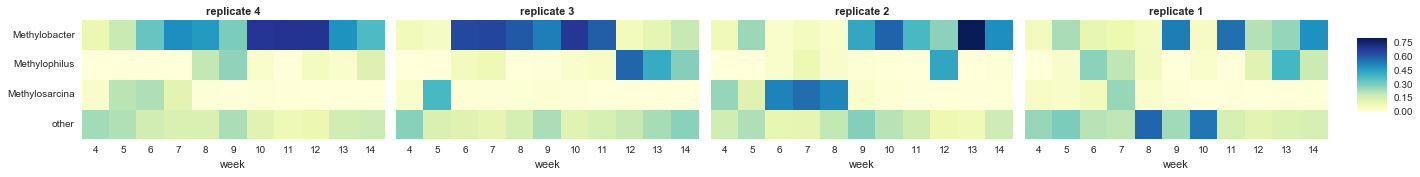

In [45]:
from abundance_plot_utils import plot_heatmap

# demo:
plot_heatmap(data=data_reduced_genus, high=0.6, low = 0.5, 
             oxy='High', rep='all', 
             plot_dir="./plots/facet_replicate")

keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium' 'Methylosarcina']
filename: Low_oxygen--0.01_to_1_abundance
keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium' 'Acidovorax']
filename: Low_oxygen--0.05_to_1_abundance
keep only Low oxygen samples
['Methylobacter' 'other' 'Methylotenera' 'Flavobacterium']
filename: Low_oxygen--0.1_to_1_abundance
keep only Low oxygen samples
['Methylobacter']
filename: Low_oxygen--0.5_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.01_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.05_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Methylotenera' 'Methylophilus' 'other' 'Methylosarcina']
filename: High_oxygen--0.1_to_1_abundance
keep only High oxygen samples
['Methylobacter' 'Me

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


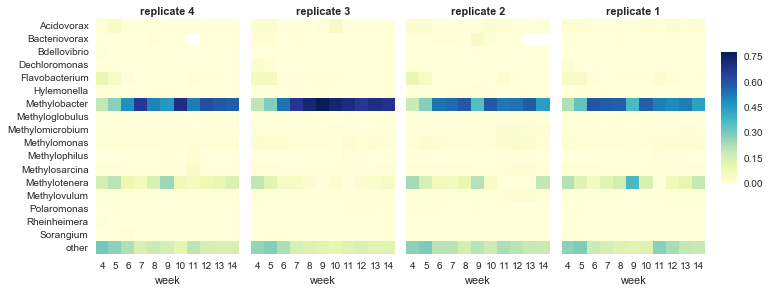

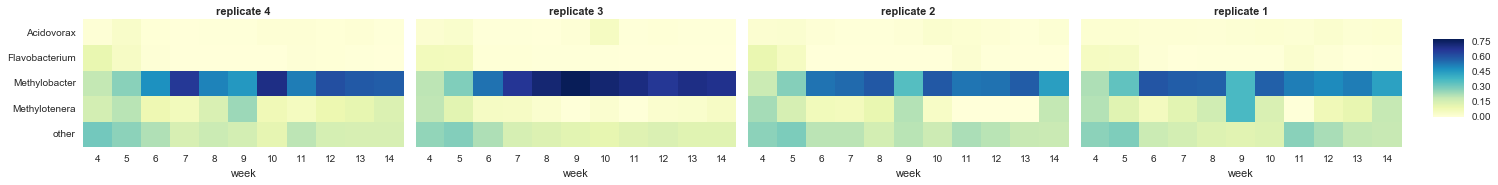

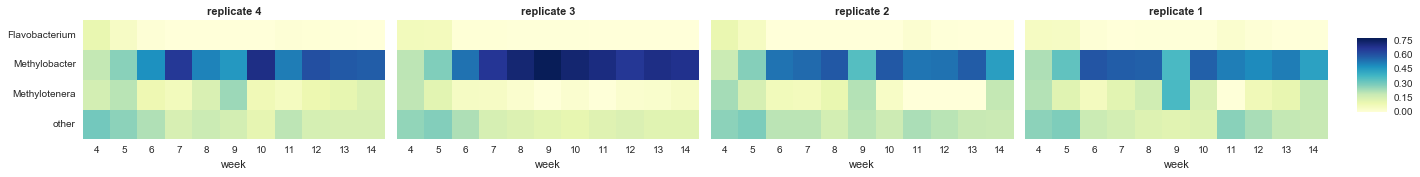

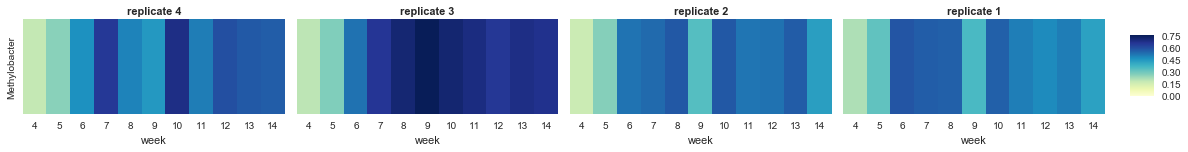

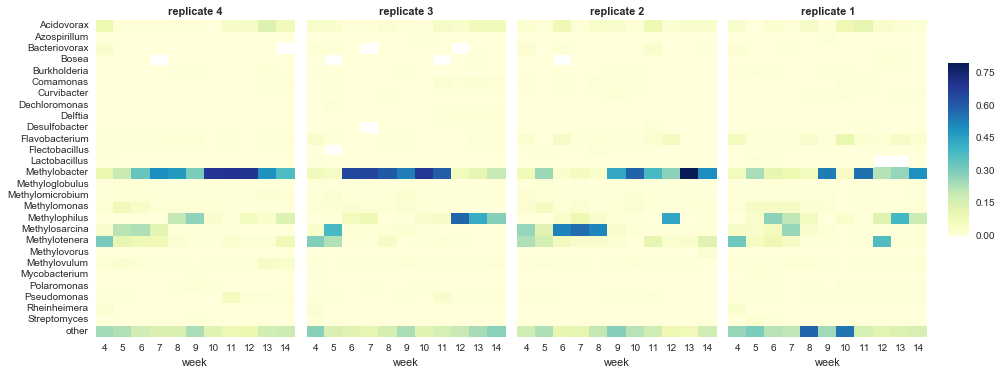

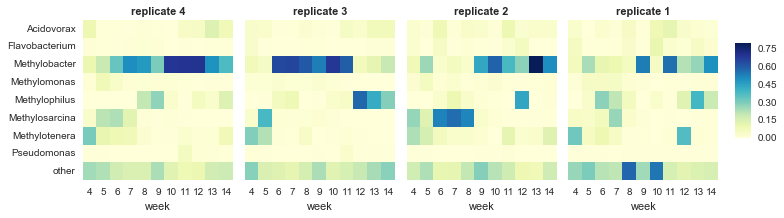

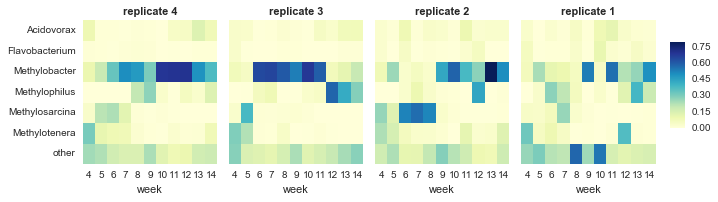

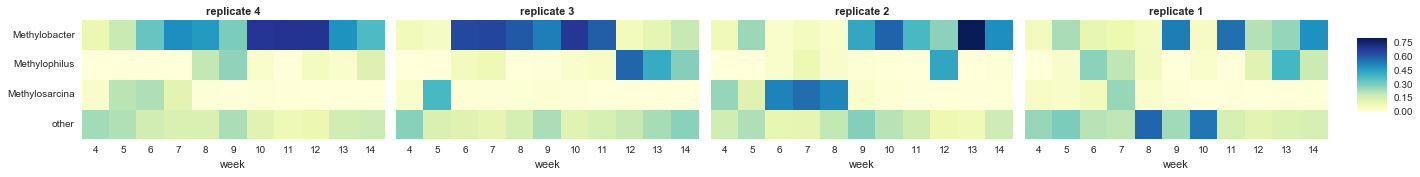

In [46]:
# Loop through the ranges we want. 
oxy_conditions = ['Low', 'High']
max_abundance = 1
range_pairs = [(0.01, max_abundance), 
               (0.05, max_abundance), 
               (0.1, max_abundance), 
               (0.5, max_abundance)]
for o in oxy_conditions:
    for r in range_pairs:
        #print "oxygen:", o
        #print "range:", r
        #print "range (low):", r[0]
        plot_heatmap(data=data_reduced_genus, 
                     low =r[0], high=r[1], oxy=o, rep='all',
                    plot_dir ='./plots/facet_replicate')

In [47]:
data_reduced_genus[data_reduced_genus['ID']=='79_HOW10'].head()

,ID,rep,week,oxy,Genus,Length,abundance,project
43553,79_HOW10,1,10,High,other,45390641,0.551019,111953914
43229,79_HOW10,1,10,High,Flavobacterium,10652885,0.111823,1056169
43059,79_HOW10,1,10,High,Acidovorax,8257013,0.091013,1056169
43343,79_HOW10,1,10,High,Methylobacter,6768132,0.050745,1056169
43353,79_HOW10,1,10,High,Methylophilus,2921876,0.036068,1056169


In [51]:
data_reduced_genus[data_reduced_genus['Genus']=='other'].head()

,ID,rep,week,oxy,Genus,Length,abundance,project
30717,4_LOW4,4,4,Low,other,33236737,0.310983,154179212
14497,16_LOW5,4,5,Low,other,40011267,0.274280,137285980
3787,10_HOW4,4,4,High,other,25528634,0.251298,145732692
40768,70_HOW9,4,9,High,other,41584590,0.237821,178490026
17813,22_HOW5,4,5,High,other,21716138,0.232195,166857164


In [49]:
data_reduced_genus.columns

Index(['ID', 'rep', 'week', 'oxy', 'Genus', 'Length', 'abundance', 'project'], dtype='object')